In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#This command tells the IPython environment to draw the plots immediately after the current cell. 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
#Early Stopping is a regularization technique for deep neural networks that stops training when parameter updates no longer begin to yield improves on a validation set.

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
#Data visualisation and preprocessing

In [8]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [9]:
print(y_train)

[6 9 9 ... 9 1 1]


In [10]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

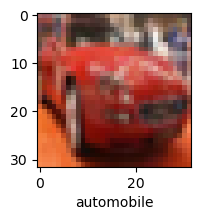

In [13]:
plot_sample(X_train,y_train,5)

In [14]:
X_train=X_train/255  #normalising the values; converting all values between 0-1
X_test=X_test/255

In [15]:
#set up basic ANN model to train the model
ann_model=models.Sequential([layers.Flatten(input_shape=(32,32,3)), #flatten into 1d array= preprocessing step
                            layers.Dense(3000,activation='relu'), #responsible for learning complex data patterns
                            layers.Dense(1000,activation='relu'),
                            layers.Dense(10,activation='softmax')])

#stochastic gradient descent- sgd
ann_model.compile(optimizer='SGD', 
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
ann_model.fit(X_train,y_train,epochs=10)
#it takes a lot of time to run so we change the runtime type to T4 GPU from CPU. this will 
#increase the speed or runtime speed. so we can increase the epoch value to get a higher accuracy
#and increse the runtime speed.


Epoch 1/10
1563/1563 [==============================] - 97s 61ms/step - loss: 1.8128 - accuracy: 0.3515
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6245 - accuracy: 0.4249
Epoch 3/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5410 - accuracy: 0.4558
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4794 - accuracy: 0.4785
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4327 - accuracy: 0.4973
Epoch 6/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.3910 - accuracy: 0.5121
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.3550 - accuracy: 0.5231
Epoch 8/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.3164 - accuracy: 0.5380
Epoch 9/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.2830 - accuracy: 0.5488
Epoch 10/10
1563/1563 [==============================] - 97s 62m

In [16]:
#set up cnn model for image classification
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 47s 29ms/step - loss: 1.4901 - accuracy: 0.4648
Epoch 2/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1136 - accuracy: 0.6084
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9792 - accuracy: 0.6578
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8950 - accuracy: 0.6880
Epoch 5/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8321 - accuracy: 0.7118


313/313 [==============================] - 5s 16ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.58      0.60      0.59      1000
           1       0.71      0.56      0.63      1000
           2       0.41      0.47      0.44      1000
           3       0.40      0.28      0.33      1000
           4       0.49      0.43      0.46      1000
           5       0.39      0.53      0.45      1000
           6       0.61      0.56      0.58      1000
           7       0.67      0.53      0.59      1000
           8       0.63      0.64      0.63      1000
           9       0.50      0.69      0.58      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.53     10000
weighted avg       0.54      0.53      0.53     10000

313/313 [==============================] - 4s 13ms/step


'ship'

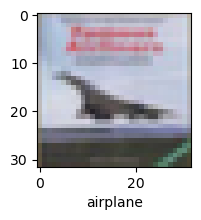

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann_model.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification report:\n",classification_report(y_test,y_pred_classes))
cnn.evaluate(X_test,y_test)
y_pred= cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]
y_test[:5]


In [38]:
print(len(y_classes))

10000
